In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')



In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "/content/gdrive/My Drive/Meghana/FIRE-SMOKE-DATASET/Train"

training_datagen = ImageDataGenerator(rescale=1./255,
																			zoom_range=0.15,
																			horizontal_flip=True,
                                      fill_mode='nearest')

VALIDATION_DIR = "/content/gdrive/My Drive/Meghana/FIRE-SMOKE-DATASET/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	shuffle = True,
	class_mode='categorical',
  batch_size = 128
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
	shuffle = True,
  batch_size= 14
)

Found 1799 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

input_tensor = Input(shape=(224, 224, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

predict = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)

Epoch 1/20
14/14 [==============================] - 609s 42s/step - loss: 15.1499 - acc: 0.6493 - val_loss: 0.1306 - val_acc: 0.9541
Epoch 2/20
14/14 [==============================] - 215s 15s/step - loss: 0.1525 - acc: 0.9567 - val_loss: 0.1373 - val_acc: 0.9388
Epoch 3/20
14/14 [==============================] - 211s 15s/step - loss: 0.0865 - acc: 0.9684 - val_loss: 0.1170 - val_acc: 0.9490
Epoch 4/20
14/14 [==============================] - 211s 15s/step - loss: 0.2742 - acc: 0.9396 - val_loss: 0.1450 - val_acc: 0.9643
Epoch 5/20
14/14 [==============================] - 214s 15s/step - loss: 0.0696 - acc: 0.9717 - val_loss: 0.1028 - val_acc: 0.9592


 Reached The Destination!


In [ ]:

for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

predict = model.fit(
    train_generator,
    steps_per_epoch = 14,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 14,
    callbacks=[callbacks]
)
print(len(base_model.layers))

Epoch 1/10
14/14 [==============================] - 279s 19s/step - loss: 0.4023 - acc: 0.7673 - val_loss: 0.1167 - val_acc: 0.9541
Epoch 2/10
14/14 [==============================] - 270s 19s/step - loss: 0.3571 - acc: 0.8094 - val_loss: 0.1218 - val_acc: 0.9541
Epoch 3/10
14/14 [==============================] - 273s 19s/step - loss: 0.2965 - acc: 0.8624 - val_loss: 0.1345 - val_acc: 0.9490
Epoch 4/10
14/14 [==============================] - 270s 19s/step - loss: 0.2568 - acc: 0.8966 - val_loss: 0.1444 - val_acc: 0.9592
Epoch 5/10
14/14 [==============================] - 270s 19s/step - loss: 0.2036 - acc: 0.9399 - val_loss: 0.1521 - val_acc: 0.9541
Epoch 6/10
14/14 [==============================] - 273s 19s/step - loss: 0.2103 - acc: 0.9295 - val_loss: 0.1578 - val_acc: 0.9541
Epoch 7/10
14/14 [==============================] - 272s 19s/step - loss: 0.1917 - acc: 0.9441 - val_loss: 0.1628 - val_acc: 0.9490
Epoch 8/10
14/14 [==============================] - 290s 21s/step - loss: 0.

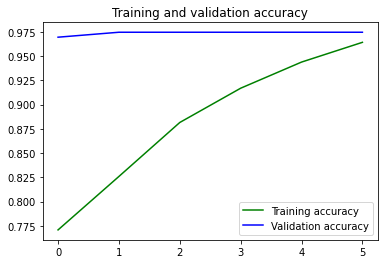

<Figure size 432x288 with 0 Axes>

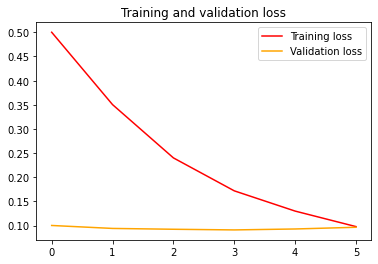

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()


In [ ]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving fire.jpg to fire.jpg
Saving wifi.png to wifi.png
True 1.0
False 0.9482758
